# Binary Classification with a Bank Churn Dataset 

## Goal: For this Episode of the Series, your task is to predict whether a customer continues with their account or closes it (e.g., churns). Good luck!

### Evaluation: Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
- Utilize ROC/AUC
- Target = Excited

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

In [3]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [5]:
target = df['Exited']
df = df.drop('Exited', axis=1)

## Exploratory Data Analysis

In [6]:
column_names = list(df.columns)
column_names

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [7]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [8]:
df.shape

(165034, 13)

In [9]:
# 165034 Rows, 14 Columns, 12 Numerical Columns, 2 Non-Numerical Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


In [10]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [11]:
non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist()
non_numeric_columns

['Surname', 'Geography', 'Gender']

In [12]:
# There are no missing Data
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [13]:
# Need to Normalize due to large distribution vs that of other column data
print(f"Min Credit Score: {df['CreditScore'].min()}, Max Credit Score: {df['CreditScore'].max()}")
print(f"Min Balance: {df['Balance'].min()}, Max Balance: {df['Balance'].max()}")

Min Credit Score: 350, Max Credit Score: 850
Min Balance: 0.0, Max Balance: 250898.09


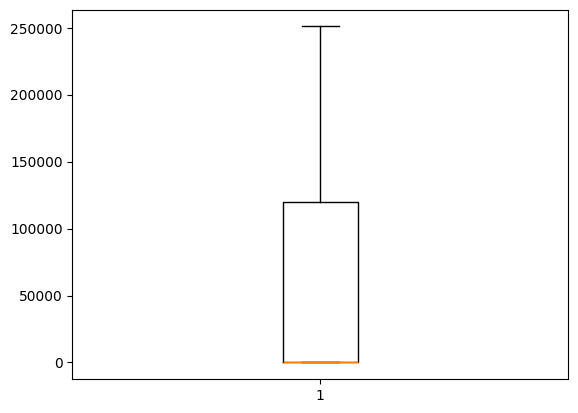

In [14]:
# Heavily lower bound weighted,anything above 75th percentile is within 130k and 250k.
# Median - 0

plt.boxplot(df['Balance'])
plt.show()

In [15]:
# balance_bins = [0, 50000, 100000, 150000, 200000, 300000]
# balance_labels = ['50000', '100000', '150000','200000', '250000+']
# df['Balance_category'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels, include_lowest=True)

In [16]:
# df['Balance_category'].unique()

<Axes: xlabel='Balance', ylabel='Count'>

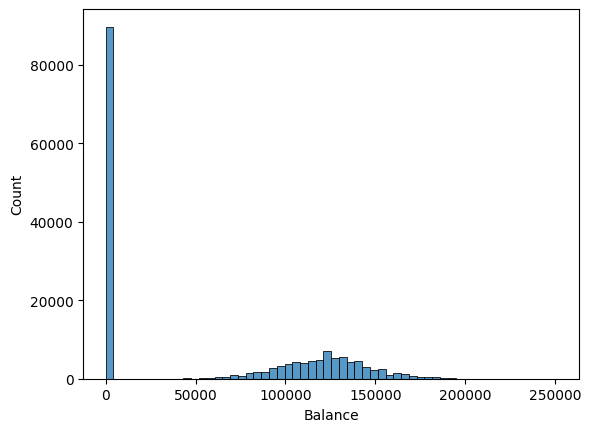

In [17]:
# Categorizing the Variable into bins allowed us to see that there is a large skew towards the left
sns.histplot(df['Balance'])

In [18]:
print(f"Balance of 0: {df[df['Balance'] == 0]['Balance'].count()}")
print(f"Balance greater than 0: {df[df['Balance'] > 0]['Balance'].count()}")

Balance of 0: 89648
Balance greater than 0: 75386


### Creating two different categories for Balance: 0 - Those without balance, 1 - Those with Balance
Reasoning: Accounts with balance of 0 creates a skew, having 89648 and those with a balance at 75386.

In [19]:
df['Balance'] = df['Balance'].map(lambda balance: 1 if balance > 0 else balance)

In [20]:
df['Balance'].unique()

array([0., 1.])

In [21]:
df['Balance']

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
165029    0.0
165030    0.0
165031    0.0
165032    1.0
165033    0.0
Name: Balance, Length: 165034, dtype: float64

### Checking for normal distribution amongst the credit scores

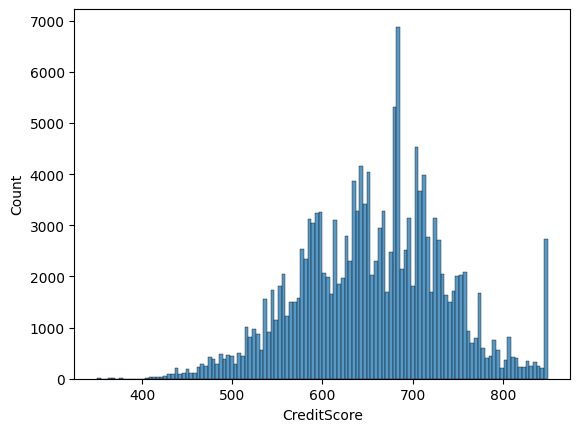

In [22]:
sns.histplot(df['CreditScore'])
plt.show()

It seems that Age: 0.34, number of products: -0.21, and IsActiveMember: -0.21 are most correlated to the target variable, assuming linearity amongst columns.

<Axes: >

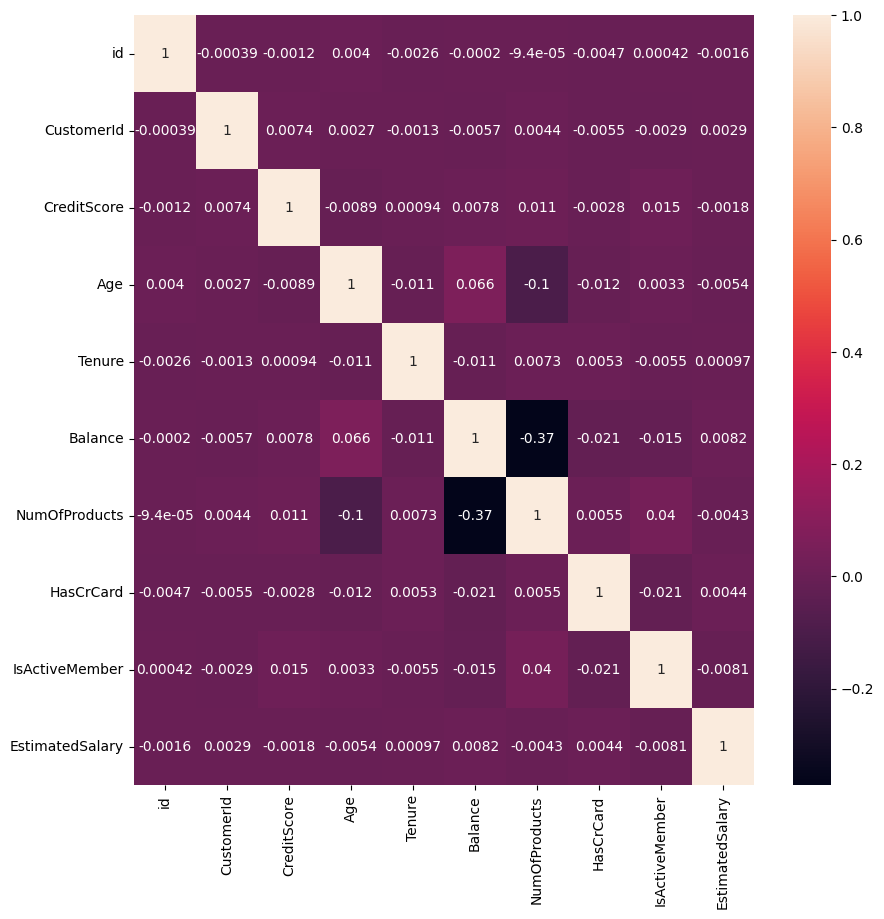

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True)

# Preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [25]:
def pre_process(dataframe):
    le = LabelEncoder()
    scaler = StandardScaler()
    dataframe.drop(['id', 'Surname', 'CustomerId'], axis=1, inplace=True)
    dataframe['Gender'] = le.fit_transform(dataframe['Gender'])
    dataframe['Geography'] = le.fit_transform(dataframe['Geography'])
    new_df = scaler.fit_transform(dataframe)
    return new_df

In [26]:
df = pre_process(df)

In [27]:
test_df = pre_process(test_df)

# Frequently used Functions

In [93]:
# Learning Curve and Plot
from sklearn.model_selection import learning_curve
def model_learning_curve(model,X_train,y_train,title):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.grid(True)
    plt.title(f'{title} Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()

In [29]:
# Validation Curve and Plot
from sklearn.model_selection import validation_curve
def model_validation_curve(model, X_train, y_train, param, param_range, label):
    param_range = param_range

    train_scores, test_scores = validation_curve(model, X_train, y_train, param_name=param, param_range=param_range, cv=3, scoring='accuracy', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, label='Training Accuracy')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(param_range, test_mean, label='Validation Accuracy')
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.grid(True)
    plt.title('Validation Curve')
    plt.xlabel(label)
    plt.ylabel('Accuracy')
    plt.legend()

# Machine Learning Models

In [30]:
# Create Train and Test datasets
X_train = df
y_train = target
X_test = test_df

In [31]:
# Get a subset of the training data for manual tuning
subset_size = 50000
subset_indices = np.random.choice(X_train.shape[0], size=subset_size, replace=False)
X_train_subset = X_train[subset_indices]
y_train_subset = y_train[subset_indices]

In [95]:
print(f'X_train_subset: {X_train_subset.shape}')
print(f'y_train_subset: {y_train_subset.shape}')

X_train_subset: (50000, 10)
y_train_subset: (50000,)


# Manual Hyperparameter Tuning

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

In [97]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42)

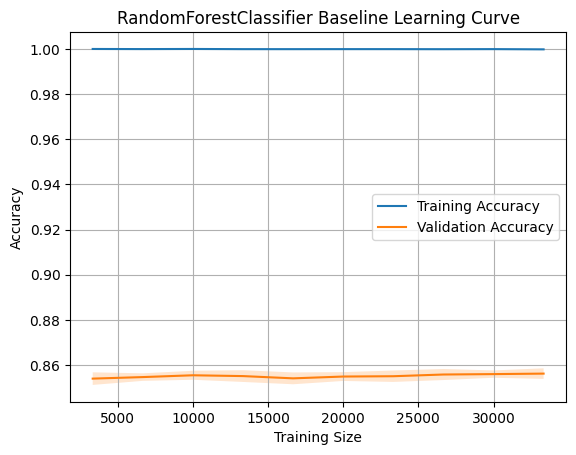

In [98]:
model_learning_curve(rf, X_train_subset, y_train_subset, "RandomForestClassifier Baseline")

In [36]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42)

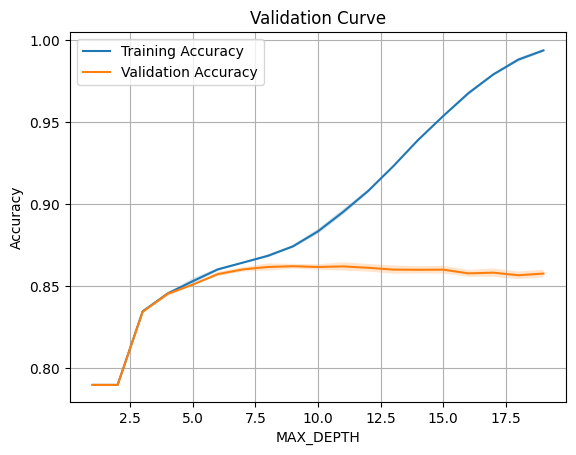

In [37]:
model_validation_curve(rf, X_train_subset, y_train_subset, param="max_depth", param_range=np.arange(1,20), label="MAX_DEPTH")

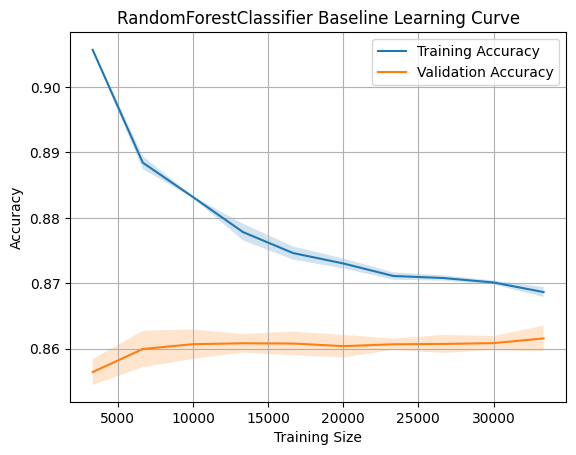

In [55]:
rf = RandomForestClassifier(max_depth=8, n_jobs=-1,random_state=42)
model_learning_curve(rf, X_train_subset, y_train_subset, "RandomForestClassifier Baseline")

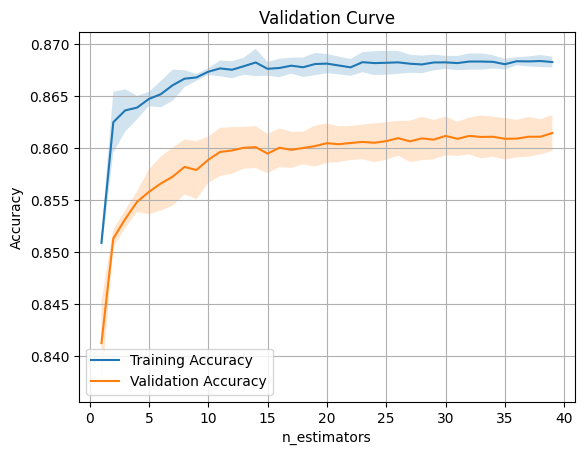

In [57]:
rf = RandomForestClassifier(max_depth=8, n_jobs=-1,random_state=42)
model_validation_curve(rf, X_train_subset, y_train_subset, param="n_estimators", param_range=np.arange(1, 40), label="n_estimators")

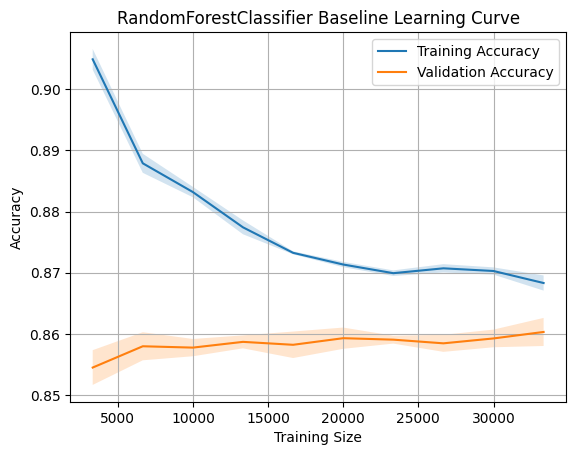

In [58]:
rf = RandomForestClassifier(max_depth=8, n_estimators=14, n_jobs=-1,random_state=42)
model_learning_curve(rf, X_train_subset, y_train_subset, "RandomForestClassifier Baseline")

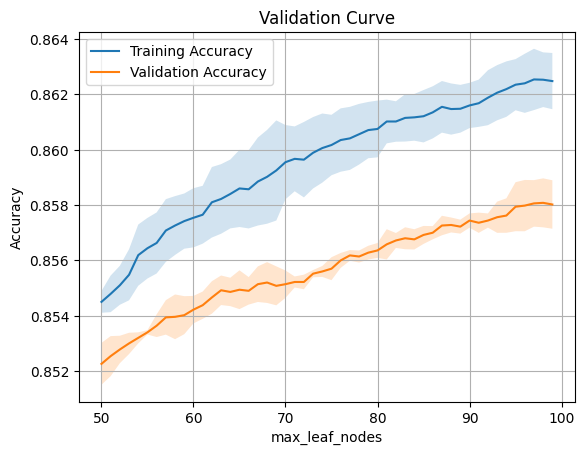

In [61]:
rf = RandomForestClassifier(max_depth=8, n_estimators=14, n_jobs=-1,random_state=42)
model_validation_curve(rf, X_train_subset, y_train_subset, param="max_leaf_nodes", param_range=np.arange(50, 100), label="max_leaf_nodes")

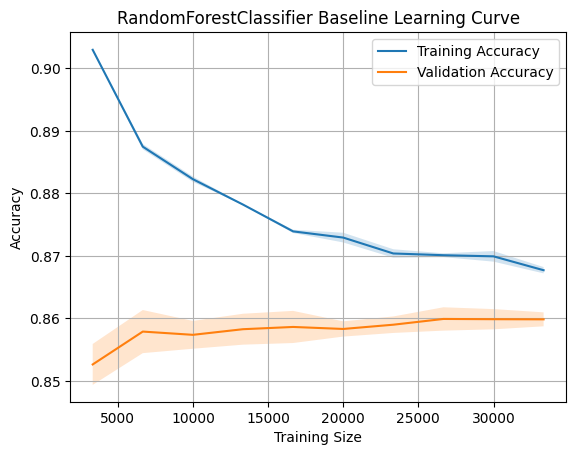

In [72]:
rf = RandomForestClassifier(max_depth=8, n_estimators=14,max_leaf_nodes=1000, n_jobs=-1,random_state=42)
model_learning_curve(rf, X_train_subset, y_train_subset, "RandomForestClassifier Baseline")

In [73]:
# Cross Validation on entire Dataset (X_train, y_train)
rf = RandomForestClassifier(max_depth=8, n_estimators=14,max_leaf_nodes=1000, n_jobs=-1,random_state=42)
print(cross_val_score(rf, X_train, y_train, cv=3))

[0.85848542 0.86017342 0.86124593]


# GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
import time

# Grid Search Results
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_leaf_nodes': [100, 200, 300]
}
# Start the timer
start_time = time.time()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Elapsed time: 253.87902903556824 seconds
{'max_depth': 10, 'max_leaf_nodes': 300, 'n_estimators': 300}


In [78]:
best_params = {'max_depth': 10, 'max_leaf_nodes': 300, 'n_estimators': 300}

In [79]:
rf = RandomForestClassifier(**best_params, random_state=42)

In [80]:
print(cross_val_score(rf, X_train, y_train, cv=3))

[0.8632662  0.86273654 0.86264565]


# Prediction

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [100]:
rf = RandomForestClassifier(max_depth=8, n_estimators=14,max_leaf_nodes=1000, n_jobs=-1,random_state=42)

In [101]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=1000, n_estimators=14,
                       n_jobs=-1, random_state=42)

In [102]:
y_pred = rf.predict(X_test)

# Submission

In [103]:
submission = pd.read_csv('sample_submission.csv')

In [104]:
submission['Exited'] = y_pred

In [105]:
submission.to_csv('submission.csv', index=False)